In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download historical data for Nifty Bees from Yahoo Finance
ticker = 'NIFTYBEES.NS'
data = yf.download(ticker, start='2020-01-01', end='2025-01-01')

print(data.head())

C:\Users\abhay\AppData\Local\Temp\ipykernel_3252\2865029080.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open       Volume
Ticker     NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS
Date                                                                       
2020-01-01   129.419998   131.000000   128.949997   128.949997       269259
2020-01-02   130.139999   134.600006   129.399994   132.000000       329677
2020-01-03   129.710007   130.850006   129.070007   129.070007       298681
2020-01-06   127.370003   129.470001   127.110001   129.399994       721657
2020-01-07   127.760002   128.699997   127.309998   127.949997       743200


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS,NIFTYBEES.NS
Date,,,,,
2020-01-01,129.419998,131.000000,128.949997,128.949997,269259
2020-01-02,130.139999,134.600006,129.399994,132.000000,329677
2020-01-03,129.710007,130.850006,129.070007,129.070007,298681
2020-01-06,127.370003,129.470001,127.110001,129.399994,721657
2020-01-07,127.760002,128.699997,127.309998,127.949997,743200
...,...,...,...,...,...
2024-12-24,265.489990,266.880005,264.619995,264.619995,2225487
2024-12-26,265.670013,269.850006,257.549988,257.549988,2230343


In [4]:
# Calculate the Short-term and Long-term Simple Moving Averages
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Remove NaN values generated by rolling mean
data.dropna(inplace=True)

# Identify signals
data['Signal'] = 0 # 1 for Buy, -1 for Sell
data.loc[data['SMA50'] > data['SMA200'], 'Signal'] = 1
data.loc[data['SMA50'] < data['SMA200'], 'Signal'] = -1

# Find the exact crossover points
# A position is taken the day AFTER the crossover
data['Position'] = data['Signal'].diff()

print(data.tail())

Price             Close         High          Low         Open       Volume  \
Ticker     NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS   
Date                                                                          
2024-12-24   265.489990   266.880005   264.619995   264.619995      2225487   
2024-12-26   265.670013   269.850006   257.549988   257.549988      2230343   
2024-12-27   266.390015   267.500000   265.049988   265.049988      1920316   
2024-12-30   264.369995   267.769989   263.950012   267.769989      3231585   
2024-12-31   264.470001   265.000000   262.510010   262.700012      3333212   

Price            SMA50      SMA200 Signal Position  
Ticker                                              
Date                                                
2024-12-24  271.339803  265.511651      1      0.0  
2024-12-26  271.038003  265.605751      1      0.0  
2024-12-27  270.769203  265.698551      1      0.0  
2024-12-30  270.486603  265.783701      1      0.

In [5]:
# Calculate daily returns of the asset
data['Market Returns'] = data['Close'].pct_change()

# Calculate strategy returns
# We use .shift(1) because we take a position based on the previous day's signal
data['Strategy Returns'] = data['Market Returns'] * data['Signal'].shift(1)

# Calculate cumulative returns for both market and strategy
data['Cumulative Market Returns'] = (1 + data['Market Returns']).cumprod()
data['Cumulative Strategy Returns'] = (1 + data['Strategy Returns']).cumprod()

print(data.tail())

Price             Close         High          Low         Open       Volume  \
Ticker     NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS NIFTYBEES.NS   
Date                                                                          
2024-12-24   265.489990   266.880005   264.619995   264.619995      2225487   
2024-12-26   265.670013   269.850006   257.549988   257.549988      2230343   
2024-12-27   266.390015   267.500000   265.049988   265.049988      1920316   
2024-12-30   264.369995   267.769989   263.950012   267.769989      3231585   
2024-12-31   264.470001   265.000000   262.510010   262.700012      3333212   

Price            SMA50      SMA200 Signal Position Market Returns  \
Ticker                                                              
Date                                                                
2024-12-24  271.339803  265.511651      1      0.0      -0.000640   
2024-12-26  271.038003  265.605751      1      0.0       0.000678   
2024-12-27  270.769203

In [6]:
# Get the last row of the cumulative returns columns
total_market_return = data['Cumulative Market Returns'].iloc[-1]
total_strategy_return = data['Cumulative Strategy Returns'].iloc[-1]

print(f"Total Buy-and-Hold Return: {total_market_return:.2%}")
print(f"Total Strategy Return: {total_strategy_return:.2%}")

# (Optional advanced metrics: Sharpe Ratio, Max Drawdown, Win Rate)

Total Buy-and-Hold Return: 208.56%
Total Strategy Return: 175.98%


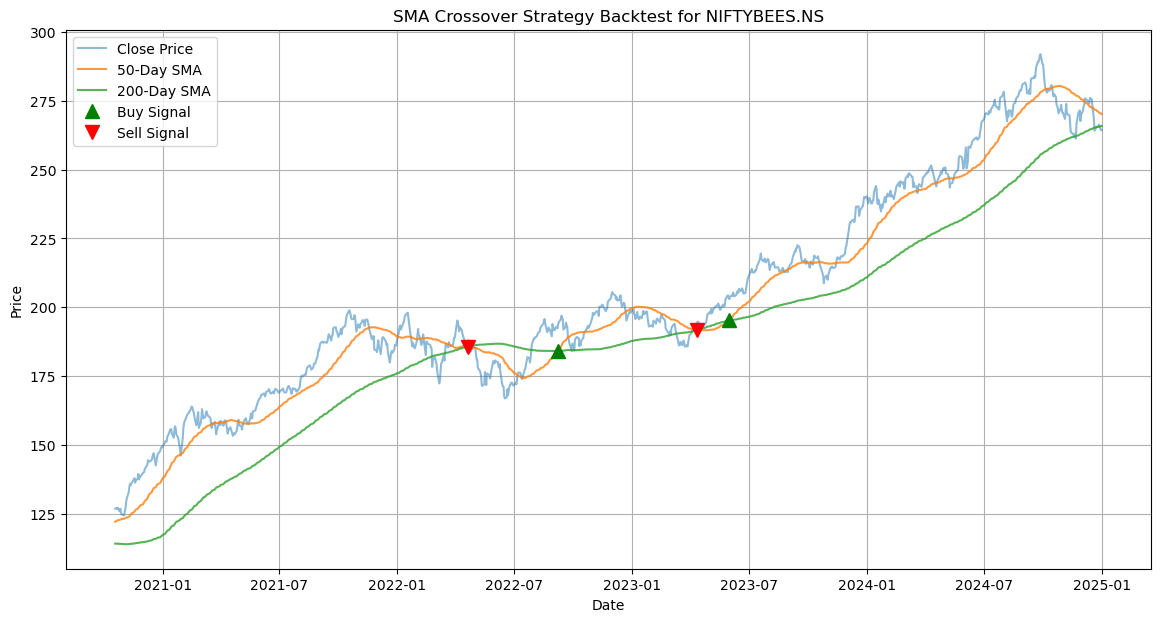

In [7]:
plt.figure(figsize=(14, 7))

# Plot closing price and SMAs
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['SMA50'], label='50-Day SMA', alpha=0.8)
plt.plot(data['SMA200'], label='200-Day SMA', alpha=0.8)

# Plot Buy signals (where Position is 2, because Signal went from -1 to 1)
plt.plot(data[data['Position'] == 2].index, 
         data['SMA50'][data['Position'] == 2], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot Sell signals (where Position is -2, because Signal went from 1 to -1)
plt.plot(data[data['Position'] == -2].index, 
         data['SMA50'][data['Position'] == -2], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title(f'SMA Crossover Strategy Backtest for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()